In [282]:
import pandas as pd
import numpy as np


In [16]:
abalone = pd.read_csv('abalone.csv')

In [17]:
abalone.head()

,sex,length,diameter,height,weight.w,weight.s,weight.v,weight.sh,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [18]:
target= abalone['rings']

In [19]:
#we use inplace so that it automatically changes original dataset without assigning a variable
abalone.drop('rings',axis=1,inplace=True)

In [20]:
abalone_dummy = pd.get_dummies(abalone)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
[xtrain,xval,ytrain,yval] = train_test_split(abalone_dummy,target,test_size=0.3,random_state=0)

In [33]:
model = LinearRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xval)

In [37]:
mse = mean_squared_error(yval,ypred)
print(mse)
rmse=np.sqrt(mse)
print(rmse)
rsq=model.score(xval,yval)
print(rsq)

5.003851007700238
2.2369289232562215
0.5253868694528042


In [39]:
coeff = model.coef_
coeff

array([ -0.09092207,  11.17383313,   7.13345358,   9.021445  ,
       -20.00580345, -10.69336128,   9.6129019 ,   0.22895316,
        -0.55522136,   0.3262682 ])

In [283]:
market = pd.read_csv('market_data.csv')

In [284]:
market.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [285]:
market.Item_Weight = market.Item_Weight.fillna(market.Item_Weight.mean())

In [286]:
market.Outlet_Size = market.Outlet_Size.fillna(market.Outlet_Size.mode())

In [287]:
market.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

In [288]:
market_dummy = pd.get_dummies(market)

In [289]:
train,test = train_test_split(market_dummy,test_size=0.3,random_state=0)

In [290]:
train_x=train.drop('Item_Outlet_Sales',axis=1)
test_x= test.drop('Item_Outlet_Sales',axis=1)
test_y= test['Item_Outlet_Sales']
train_y=train['Item_Outlet_Sales']

In [291]:
model = LinearRegression()
model.fit(train_x,train_y)
ypred = model.predict(test_x)

# Regularisation

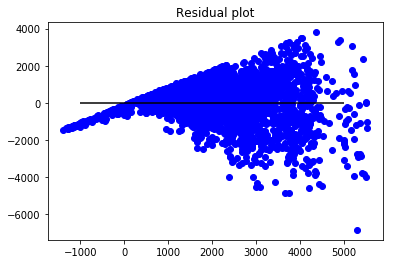

In [296]:
import matplotlib.pyplot as plt
x_plot = plt.scatter(ypred,(ypred - test_y),c='b')
plt.hlines(y=0,xmin=-1000,xmax=5000)
plt.title('Residual plot')
predictors = train_x.columns


In [ ]:
- if heteroskedacity exists it will be like afunnel shape
- heteroskedacity :the presence of non consistent variance in error terms is called heteroskedacity
- 

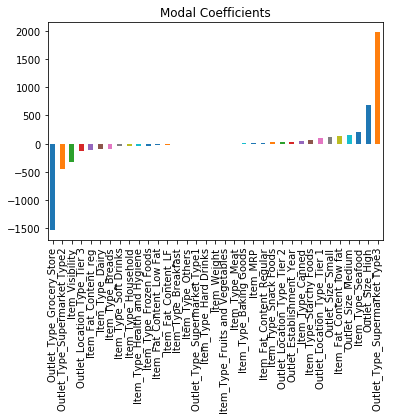

In [298]:
coef = pd.Series(model.coef_,predictors).sort_values()
plt.figure(1)
coef.plot(kind='bar',title='Modal Coefficients')

In [304]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha = 0.05,normalize=True)
ridgeReg.fit(train_x,train_y)
ridge_pred = ridgeReg.predict(test_x)
mse_rid = np.sqrt(np.mean((ridge_pred -test_y)**2))
rsq_ridge = ridgeReg.score(test_x,test_y)
print('mean square error:',mse_rid,'rsquare:',rsq_ridge)

mean square error: 1159.9480003405818 rsquare: 0.558146791930104


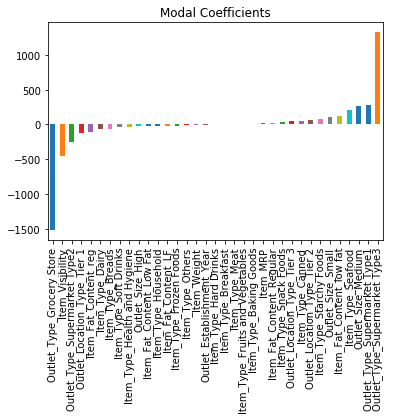

In [307]:
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
plt.figure(2)
coef.plot(kind='bar',title='Modal Coefficients')

In [308]:
#0
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha = 0,normalize=True)
ridgeReg.fit(train_x,train_y)
ridge_pred = ridgeReg.predict(test_x)
mse_rid = np.sqrt(np.mean((ridge_pred -test_y)**2))
rsq_ridge = ridgeReg.score(test_x,test_y)
print('mean square error:',mse_rid,'rsquare:',rsq_ridge)

mean square error: 1154.5099997648385 rsquare: 0.562280021472186


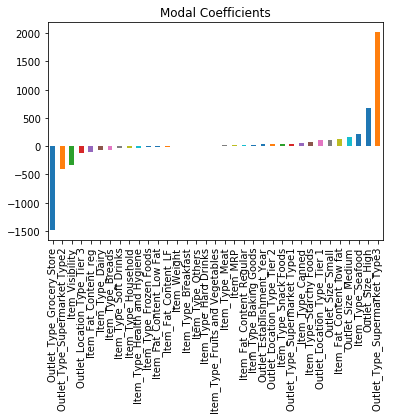

In [309]:
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
plt.figure(2)
coef.plot(kind='bar',title='Modal Coefficients')

In [312]:
#0.5
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha = 0.5,normalize=True)
ridgeReg.fit(train_x,train_y)
ridge_pred = ridgeReg.predict(test_x)
mse_rid = np.sqrt(np.mean((ridge_pred -test_y)**2))
rsq_ridge = ridgeReg.score(test_x,test_y)
print('mean square error:',mse_rid,'rsquare:',rsq_ridge)

mean square error: 1237.5242222591833 rsquare: 0.4970690207667118


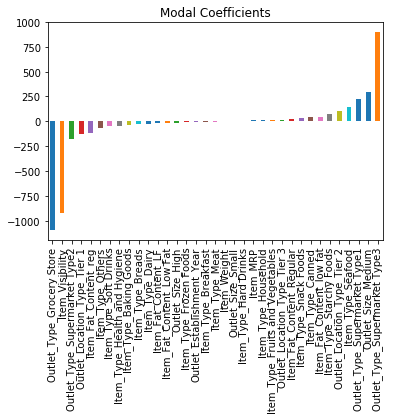

In [313]:
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
plt.figure(2)
coef.plot(kind='bar',title='Modal Coefficients')

mean square error: 1321.1685441369768 rsquare: 0.4267851652347415


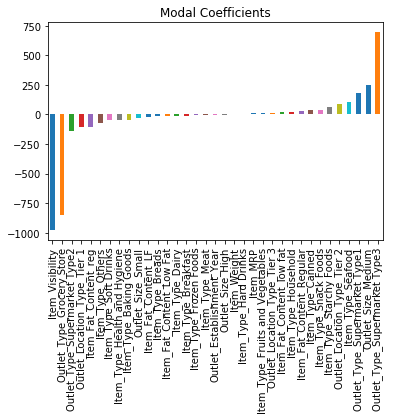

In [318]:
#1
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha = 1,normalize=True)
ridgeReg.fit(train_x,train_y)
ridge_pred = ridgeReg.predict(test_x)
mse_rid = np.sqrt(np.mean((ridge_pred -test_y)**2))
rsq_ridge = ridgeReg.score(test_x,test_y)
print('mean square error:',mse_rid,'rsquare:',rsq_ridge)
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
plt.figure(2)
coef.plot(kind='bar',title='Modal Coefficients')

mean square error: 1498.2192633957702 rsquare: 0.26285703545515193


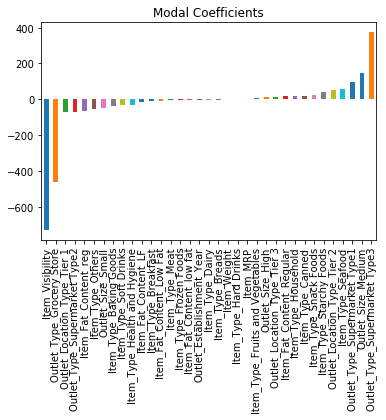

In [319]:
#3
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha = 3,normalize=True)
ridgeReg.fit(train_x,train_y)
ridge_pred = ridgeReg.predict(test_x)
mse_rid = np.sqrt(np.mean((ridge_pred -test_y)**2))
rsq_ridge = ridgeReg.score(test_x,test_y)
print('mean square error:',mse_rid,'rsquare:',rsq_ridge)
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
plt.figure(2)
coef.plot(kind='bar',title='Modal Coefficients')

mean square error: 1645.979212306871 rsquare: 0.11028755879332808


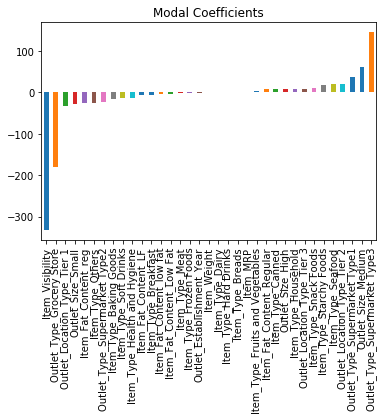

In [320]:
#10
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha = 10,normalize=True)
ridgeReg.fit(train_x,train_y)
ridge_pred = ridgeReg.predict(test_x)
mse_rid = np.sqrt(np.mean((ridge_pred -test_y)**2))
rsq_ridge = ridgeReg.score(test_x,test_y)
print('mean square error:',mse_rid,'rsquare:',rsq_ridge)
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
plt.figure(2)
coef.plot(kind='bar',title='Modal Coefficients')

mean square error: 1160.554960080186 rsquare: 0.5576842586537055


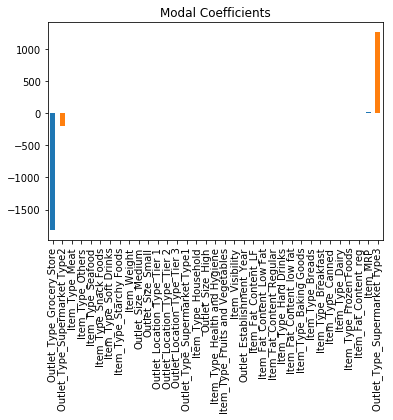

In [324]:
from sklearn.linear_model import Lasso
ridgeReg = Lasso(alpha =0.5 ,normalize=True)
ridgeReg.fit(train_x,train_y)
ridge_pred = ridgeReg.predict(test_x)
mse_rid = np.sqrt(np.mean((ridge_pred -test_y)**2))
rsq_ridge = ridgeReg.score(test_x,test_y)
print('mean square error:',mse_rid,'rsquare:',rsq_ridge)
coef = pd.Series(ridgeReg.coef_,predictors).sort_values()
plt.figure(2)
coef.plot(kind='bar',title='Modal Coefficients')

In [87]:
mse = mean_squared_error(test_y,ypred)
print(mse)
rmse=np.sqrt(mse)
print(rmse)
rsq=model.score(test_x,test_y)
print(rsq)

1332893.3395570058
1154.5099997648379
0.5622800214721861


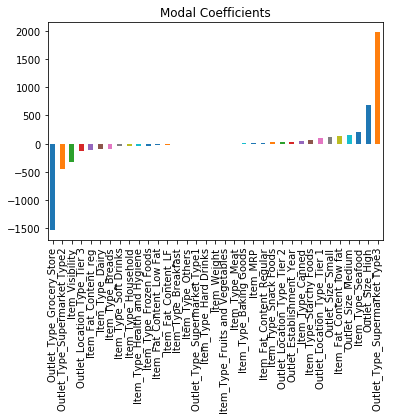

In [310]:
coef = pd.Series(model.coef_,predictors).sort_values()
plt.figure(2)
coef.plot(kind='bar',title='Modal Coefficients')

In [101]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
market['Outlet_Size']=LE.fit_transform(market['Outlet_Size'])

TypeError: '<' not supported between instances of 'str' and 'float'

# Model Tuning

In [270]:
market = pd.read_csv('market_data.csv')
market.shape

(8523, 12)

In [271]:
market.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

In [272]:
market['Outlet_Size']=market['Outlet_Size'].replace({'Medium':2,'Small':1,'High':3})

In [273]:
market.Item_Weight = market.Item_Weight.fillna(market.Item_Weight.mean())

In [274]:
market.Outlet_Size = market.Outlet_Size.fillna(2)

In [276]:
market_low  = market[market['Outlet_Size']==1]
market_medium = market[market['Outlet_Size']==2]
market_high  = market[market['Outlet_Size']==3]


In [279]:
#marketlow
market_dummies = pd.get_dummies(market_low)
train,test = train_test_split(market_dummies,test_size=0.3,random_state=0)
train_x=train.drop('Item_Outlet_Sales',axis=1)
test_x= test.drop('Item_Outlet_Sales',axis=1)
test_y= test['Item_Outlet_Sales']
train_y=train['Item_Outlet_Sales']
model = LinearRegression()
model.fit(train_x,train_y)
ypred = model.predict(test_x)
mse = mean_squared_error(test_y,ypred)
print(mse)
rmse=np.sqrt(mse)
print(rmse)
rsq=model.score(test_x,test_y)
print(rsq)

1182251.7576589554
1087.3140106054716
0.5454812360955464


In [280]:
market_dummies = pd.get_dummies(market_medium)
train,test = train_test_split(market_dummies,test_size=0.3,random_state=0)
train_x=train.drop('Item_Outlet_Sales',axis=1)
test_x= test.drop('Item_Outlet_Sales',axis=1)
test_y= test['Item_Outlet_Sales']
train_y=train['Item_Outlet_Sales']
model = LinearRegression()
model.fit(train_x,train_y)
ypred = model.predict(test_x)
mse = mean_squared_error(test_y,ypred)
print(mse)
rmse=np.sqrt(mse)
print(rmse)
rsq=model.score(test_x,test_y)
print(rsq)

1385976.489688033
1177.275027208185
0.571340511366947


In [281]:
market_dummies = pd.get_dummies(market_high)
train,test = train_test_split(market_dummies,test_size=0.3,random_state=0)
train_x=train.drop('Item_Outlet_Sales',axis=1)
test_x= test.drop('Item_Outlet_Sales',axis=1)
test_y= test['Item_Outlet_Sales']
train_y=train['Item_Outlet_Sales']
model = LinearRegression()
model.fit(train_x,train_y)
ypred = model.predict(test_x)
mse = mean_squared_error(test_y,ypred)
print(mse)
rmse=np.sqrt(mse)
print(rmse)
rsq=model.score(test_x,test_y)
print(rsq)

1243708.1238170506
1115.216626408094
0.5081723640063305


In [263]:
market_dummies = pd.get_dummies(market)

In [264]:
#method 4 using knn
cols_drop=['Outlet_Size']
train_x_impute = market_dummies[~pd.isnull(market_dummies['Outlet_Size'])]
train_x_impute = train_x_impute.drop(cols_drop,axis=1)
test_x_impute = market_dummies[pd.isnull(market_dummies['Outlet_Size'])]
test_x_impute = test_x_impute.drop(cols_drop,axis=1)
train_y_impute =market_dummies.loc[train_x_impute.index,'Outlet_Size']

#impute predicitons in original data
#data_dummies.loc[test_x_impute.index,'Age'] = test_y_impute_pred

In [257]:
from sklearn.neighbors import KNeighborsClassifier
model_impute  =KNeighborsClassifier(n_neighbors=5)
model_impute.fit(train_x_impute,train_y_impute)
test_y_impute_pred =model_impute.predict(test_x_impute)
market_dummies.loc[test_x_impute.index,'Outlet_Size'] = test_y_impute_pred

In [265]:
#fit decision model
from sklearn.tree import DecisionTreeClassifier
model  =DecisionTreeClassifier()
model.fit(train_x_impute,train_y_impute)
test_y_impute_pred =model.predict(test_x_impute)
market_dummies.loc[test_x_impute.index,'Outlet_Size'] = test_y_impute_pred

In [266]:
train,test = train_test_split(market_dummies,test_size=0.3,random_state=0)
train_x=train.drop('Item_Outlet_Sales',axis=1)
test_x= test.drop('Item_Outlet_Sales',axis=1)
test_y= test['Item_Outlet_Sales']
train_y=train['Item_Outlet_Sales']
model = LinearRegression()
model.fit(train_x,train_y)
ypred = model1.predict(test_x)
mse = mean_squared_error(test_y,ypred)
print(mse)
rmse=np.sqrt(mse)
print(rmse)
rsq=model.score(test_x,test_y)
print(rsq)

1338022.1039058347
1156.7290538003422
0.5607942459273693
